<a href="https://colab.research.google.com/github/ssnirgudkar/UNet/blob/main/PSPNET_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!git clone https://github.com/divamgupta/image-segmentation-keras
!git clone https://github.com/faysal-ishtiaq/image-segmentation-keras-py3


In [5]:
!cd image-segmentation-keras/keras_segmentation
 


In [ ]:
!python setup.py install

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
!pip install --upgrade git+https://github.com/divamgupta/image-segmentation-keras

In [ ]:
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y
#!pip uninstall h5py -y

!pip install tensorflow==2.4.1
!pip install keras==2.4.3


In [ ]:
!pip uninstall tensorflow tensorboard tensorboard-data-server tensorflow-datasets tensorflow-estimator tensorflow-gcs-config tensorflow-hub tensorflow-metadata tensorflow-probability keras keras-nightly Keras-Preprocessing keras-vis -y
!pip install tensorflow==2.4
!pip install git+https://github.com/divamgupta/image-segmentation-keras

In [17]:
import keras
from keras.models import model_from_json
import keras_segmentation as ks
from keras_segmentation import models  
from keras_segmentation.models import pspnet


In [22]:
#create a model skeleton for pspnet model. images need to be a multiple of 192
from keras_segmentation.models.pspnet import vgg_pspnet

model= vgg_pspnet(n_classes =3, input_height=384, input_width=576, channels=3) # load the pretrained model trained on Cityscapes dataset



In [ ]:
''' loading weights throws an error
model.train(
    train_images =  "/content/drive/MyDrive/psp-images/",
    train_annotations = "/content/drive/MyDrive/psp-seg-images",
    checkpoints_path = "/content/drive/MyDrive/Models/pspnet/" , epochs=2,
    load_weights="/content/drive/MyDrive/Models/pspnet/pspnet101_cityscapes.h5"  
)
'''

In [ ]:
'''
# load any of the 3 pretrained models - for direct inference

from keras_segmentation.pretrained import pspnet_101_cityscapes 
model = pspnet_101_cityscapes()
'''

 

In [ ]:
# for training 1st time without weights
model.train(
    train_images =  "/content/drive/MyDrive/IRImages_3classes_PSPNet",
    train_annotations = "/content/drive/MyDrive/IRImageMasks_3classes_PSPNet",
    checkpoints_path = "/content/drive/MyDrive/Logs/pspnet" , epochs=10, batch_size = 10,steps_per_epoch = 90, val_steps_per_epoch = 10
    )

In [ ]:
#save weights so that we can use it during next training 
model.save('/content/drive/MyDrive/Models/pspnet/pspnet_train_model.h5')

In [ ]:
"""
#this is for infering w/o retraining. just take weights and use it
from keras_segmentation.models.pspnet import pspnet
model1= pspnet(n_classes =3, input_height=384, input_width=576, channels=3) # load the pretrained model trained on Cityscapes dataset

from keras.models import load_model
model1 = load_model('/content/drive/MyDrive/Models/pspnet/pspnet_train_model.h5')

out = model1.predict_segmentation(
    inp="/content/drive/MyDrive/psp-images/1571161258.414889.png",
    out_fname="/content/out1.png"
)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.imshow(out)
"""

In [ ]:
# this is to train from 2nd time on, using earlier weights
model.train(
    train_images =  "/content/drive/MyDrive/psp-images/",
    train_annotations = "/content/drive/MyDrive/psp-seg-images",
    checkpoints_path = "/content/drive/MyDrive/Models/pspnet/" , epochs=2,
    load_weights="/content/drive/MyDrive/Models/pspnet/pspnet_train_model.h5"  
)

In [ ]:
# this is to infer based on the training. With gpu it gives blank.  
out = model.predict_segmentation(
    inp="/content/drive/MyDrive/IRImages_3classes_PSPNet/1571161174.581624_1.png",
    out_fname="/content/out1.png"
)

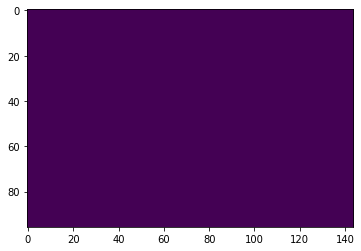

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.imshow(out)

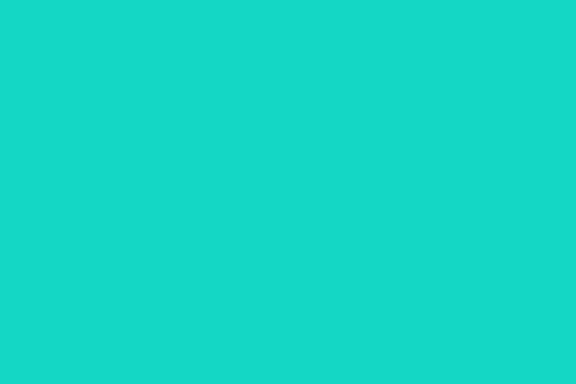

In [ ]:
from IPython.display import Image
Image('/content/out1.png')

In [ ]:
import PIL
import os
import os.path
from PIL import Image

imageDir = r'/content/drive/MyDrive/IRImageTrainingDataset/ir_train_images_resized_colored_291_images'
resizedImageDir = '/content/resize'
for file in os.listdir(imageDir):
    f_img = imageDir + "/" + file
    resized_img = resizedImageDir + "/" + file
    img = Image.open(f_img)
    img = img.resize((384,576))
    img.save(resized_img)

In [ ]:
maskDir = r'/content/drive/MyDrive/IRImageTrainingDataset/ir_train_masks_resized_relabeled_291_images'
resizedMaskDir = '/content/resize-annot'
for file in os.listdir(maskDir):
    f_img = maskDir + "/" + file
    resized_img = resizedMaskDir + "/" + file
    img = Image.open(f_img)
    img = img.resize((384,576))
    img.save(resized_img)

In [ ]:
from keras_segmentation.models.pspnet import pspnet

model = pspnet(n_classes=3, input_height=384, input_width=576  )

model.train(
    train_images =  "/content/drive/MyDrive/psp-images",
    train_annotations = "/content/drive/MyDrive/psp-seg-images",
    input_height=384,
    input_width=576,
    checkpoints_path = "/content/drive/MyDrive/Models/pspnet/pspnet_1", 
    epochs=2
    
)


In [ ]:

out = model.predict_segmentation(
    inp="/content/drive/MyDrive/psp-images/1571161174.581624.png",
    out_fname="/content/drive/MyDrive/psp-images/seg.png"
)

import matplotlib.pyplot as plt
plt.imshow(out)


In [ ]:
import cv2
import tensorflow
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import PIL

img = cv2.imread('/content/out1.png', cv2.IMREAD_UNCHANGED)
print(img.shape) # height , width, color
array1 = tensorflow.keras.preprocessing.image.img_to_array(img)
print(array1) 
print(np.unique(array1))

#print(np.unique(cv2.imread('/content/drive/MyDrive/IRImageTrainingDataset/ir_train_masks_resized_relabeled_291_images/1571161174.581624_label_ground-truth_resized_relabeled_to3wasrclasses_mirrored.png',cv2.IMREAD_UNCHANGED)))


(384, 576, 3)
[[[197. 215.  20.]
  [197. 215.  20.]
  [197. 215.  20.]
  ...
  [197. 215.  20.]
  [197. 215.  20.]
  [197. 215.  20.]]

 [[197. 215.  20.]
  [197. 215.  20.]
  [197. 215.  20.]
  ...
  [197. 215.  20.]
  [197. 215.  20.]
  [197. 215.  20.]]

 [[197. 215.  20.]
  [197. 215.  20.]
  [197. 215.  20.]
  ...
  [197. 215.  20.]
  [197. 215.  20.]
  [197. 215.  20.]]

 ...

 [[197. 215.  20.]
  [197. 215.  20.]
  [197. 215.  20.]
  ...
  [197. 215.  20.]
  [197. 215.  20.]
  [197. 215.  20.]]

 [[197. 215.  20.]
  [197. 215.  20.]
  [197. 215.  20.]
  ...
  [197. 215.  20.]
  [197. 215.  20.]
  [197. 215.  20.]]

 [[197. 215.  20.]
  [197. 215.  20.]
  [197. 215.  20.]
  ...
  [197. 215.  20.]
  [197. 215.  20.]
  [197. 215.  20.]]]
[ 20. 197. 215.]


In [ ]:
# evaluating the model 
print(model.evaluate_segmentation( inp_images_dir="/content/drive/MyDrive/psp-images/"  , annotations_dir="/content/drive/MyDrive/psp-seg-images/" ) )

6it [00:03,  1.81it/s]

{'frequency_weighted_IU': 1.0, 'mean_IU': 0.3333333333333333, 'class_wise_IU': array([1., 0., 0.])}
